# PHIDL tutorial and examples
## Subset for testing

In [1]:
from __future__ import division, print_function, absolute_import
import numpy as np

from phidl import Device, Layer, LayerSet, quickplot, make_device
import phidl.geometry as pg
import phidl.routing as pr

# Note: If you have Qt + PyQt installed, you may be able to use the much
# faster quickplot2() function.  Personally, we recommend trying the following
# Just to see if it works:
# import quickplot2 as qp
# qp(pg.rectangle())

#==============================================================================
# We'll start by assuming we have a function waveguide() which already exists
# and makes us a simple waveguide rectangle.  Many functions like this
# exist in the phidl.geometry library and are ready-for-use.  We write this
# one out fully just so it's explicitly clear what's happening
#==============================================================================

def waveguide(width = 10, height = 1):
    WG = Device('waveguide')
    WG.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)] )
    WG.add_port(name = 'wgport1', midpoint = [0,height/2], width = height, orientation = 180)
    WG.add_port(name = 'wgport2', midpoint = [width,height/2], width = height, orientation = 0)
    return WG

In [2]:
# Jupyter notebook specific
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

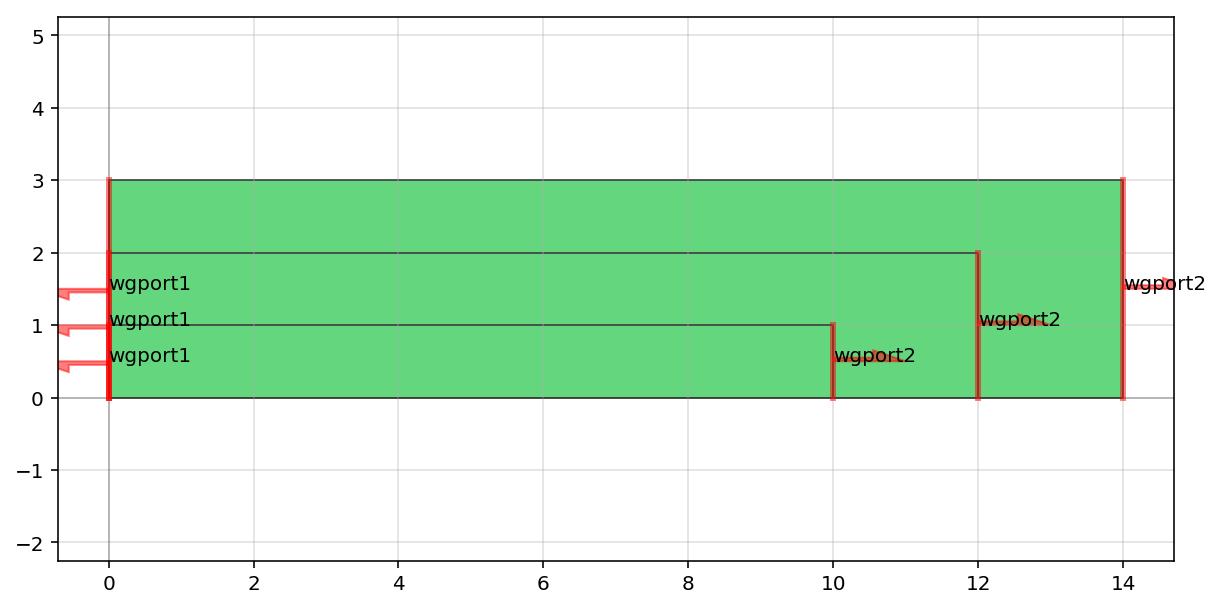

In [3]:
#==============================================================================
# Create a blank device
#==============================================================================
# Let's create a new device ``D`` which will act as a blank canvas (D can be
# thought of as a blank GDS cell with some special features). Note that when we
# make a Device, we usually assign it a variable name with a capital letter
D = Device('MultiWaveguide')

# Now say we want to add a few waveguides to to our "Device" D.
# First we create the waveguides.  As you can see from the waveguide() function
# definition, the waveguide() function creates another Device ("WG").
# This can be thought of as the waveguide() function creating another GDS cell,
# only this one has some geometry inside it.
#
# Let's create two of these Devices by calling the waveguide() function
WG1 = waveguide(width=10, height = 1)
WG2 = waveguide(width=12, height = 2)

# Now we've made two waveguides Device WG1 and WG2, and we have a blank
# device D. We can add references from the devices WG1 and WG2 to our blank
# device byz using the add_ref() function.
# After adding WG1, we see that the add_ref() function returns a handle to our
# reference, which we will label with lowercase letters wg1 and wg2.  This
# handle will be useful later when we want to move wg1 and wg2 around in D.
wg1 = D.add_ref(WG1)
wg2 = D.add_ref(WG2)

# Alternatively, we can do this all on one line
wg3 = D.add_ref(waveguide(width=14, height = 3))

quickplot(D)

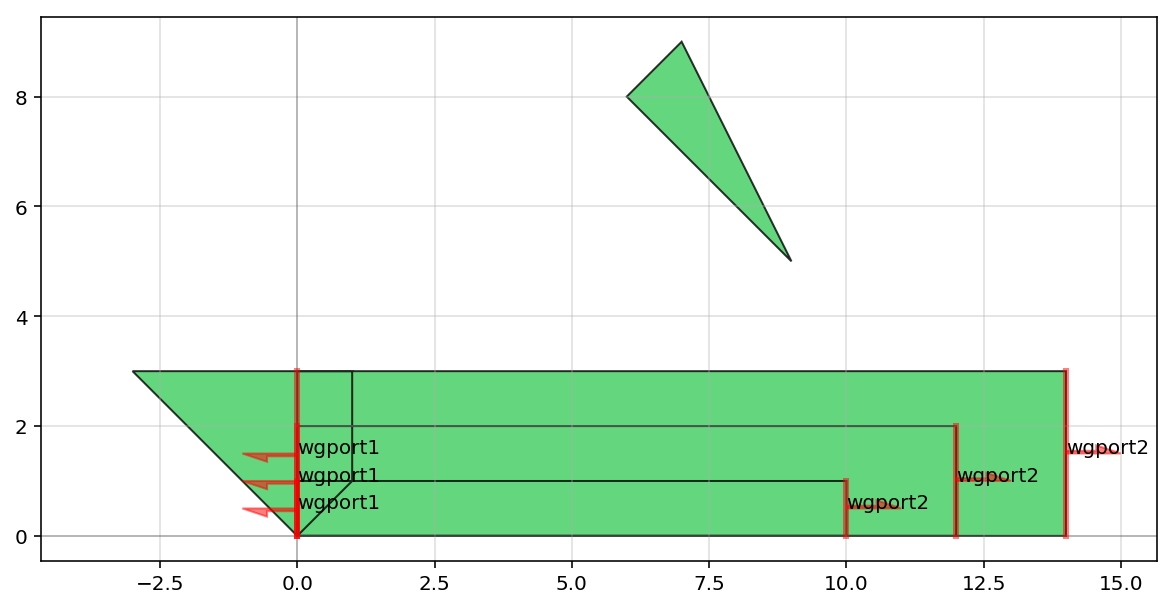

In [4]:
#==============================================================================
# Creating polygons
#==============================================================================
# Create and add a polygon from separate lists of x points and y points
# e.g. [(x1, x2, x3, ...), (y1, y2, y3, ...)]
poly1 = D.add_polygon( [(8,6,7,9), (6,8,9,5)] )

# Alternatively, create and add a polygon from a list of points
# e.g. [(x1,y1), (x2,y2), (x3,y3), ...] using the same function
poly2 = D.add_polygon( [(0, 0), (1, 1), (1, 3), (-3, 3)] )

quickplot(D)

In [5]:
#==============================================================================
# Manipulating geometry 1 - Basic movement and rotation
#==============================================================================
# There are several actions we can take to move and rotate the geometry.  These
# actions include movement, rotation, and reflection.

wg1.move([10,4]) # Shift the second waveguide we created over by dx = 10, dy = 4
wg2.move(origin = [1,1], destination = [2,2]) # Shift the second waveguide over by dx = 1, dy = 1
wg3.move([1,1], [5,5], axis = 'y') # Shift the third waveguide over by dx = 0, dy = 4 (motion only along y-axis)
poly1.movey(4) # Same as specifying axis='y' in the move() command
poly2.movex(4) # Same as specifying axis='x'' in the move() command
wg3.movex(30,40) # Moves "from" x=30 "to" x=40 (e.g. shifts wg3 by +10 in the x-direction)

wg1.rotate(45) # Rotate the first waveguide by 45 degrees around (0,0)
wg2.rotate(30, center = [1,1]) # Rotate the second waveguide by 30 degrees around (1,1)

wg1.reflect(p1 = [1,1], p2 = [1,3]) # Reflects wg3 across the line formed by p1 and p2

DeviceReference (parent Device "waveguide000001", ports ['wgport1', 'wgport2'], origin [-2.24264069  9.89949494], rotation 135.0, x_reflection True)

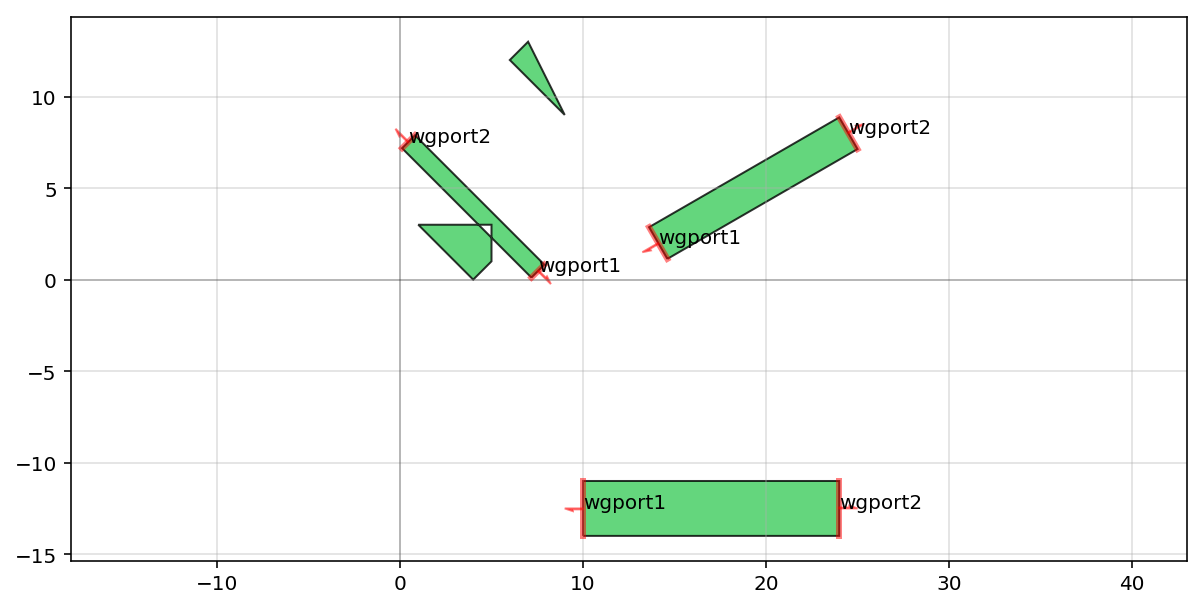

In [6]:
#==============================================================================
# Manipulating geometry 2 - Properties
#==============================================================================
# Each Device and DeviceReference object has several properties which can be used to learn
# information about the object (for instance where it's center coordinate is).  Several
# of these properties can actually be used to move the geometry by assigning them
# new values

print(wg1.bbox) # Will print the bounding box of wg1 in terms of [(xmin, ymin), (xmax, ymax)]
print(wg1.xsize) # Will print the width of wg1 in the x dimension
print(wg1.ysize) # Will print the height of wg1 in the y dimension

print(wg1.center) # Gives you the center coordinate of its bounding box
wg1.center = [4,4] # Shift wg1 such that the center coordinate of its bounding box is at (4,4)

print(wg2.xmax) # Gives you the rightmost (+x) edge of the wg2 bounding box
wg2.xmax = 25 # Moves wg2 such that it's rightmost edge is at x = 25

wg2.y = 5 # Sets the y-coordingate of the center of the shape's bounding box

wg3.ymin # Gives you the bottommost (-y) edge of the wg3 bounding box
wg3.ymin = -14 # Moves wg3 such that it's bottommost edge is at y = -14


quickplot(D)

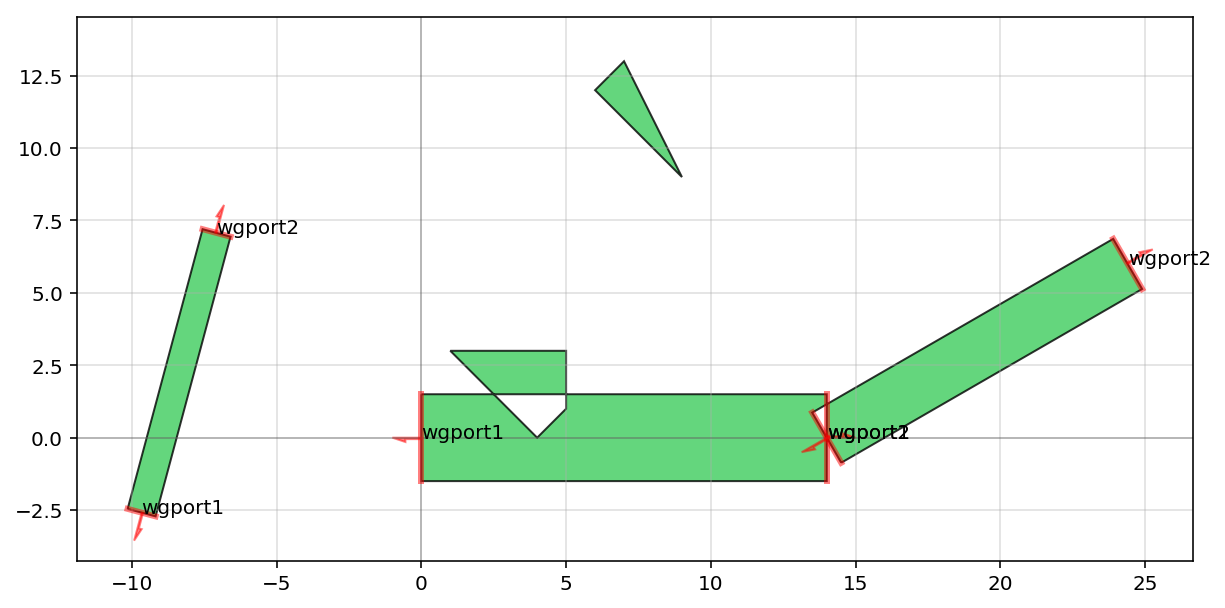

In [7]:
#==============================================================================
# Manipulating geometry 3 - Smarter movement with ports
#==============================================================================
# All the waveguides we made have two ports: 'wgport1' and 'wgport2'  We can
# use these names in place of (x,y) pairs.  For instance, if we want to move
# wg1 such that its port 'wgport1' rests on the origin, we do:
wg1.move(origin = 'wgport1', destination = [0,0])
# Alternatively, we can use the Port object itself in the same manner.  We can
# access the Port objects for any Device (or DeviceReference) by calling device.ports,
# --which returns a Python dictionary--and accessing its value with the key
wg3.move(origin = wg3.ports['wgport1'], destination = [0,0])
# We can even move one port to another
wg2.move(origin = wg2.ports['wgport1'], destination = wg3.ports['wgport2'])
# Several functions beyond just move() can take Ports as inputs
wg1.rotate(angle = -60, center = wg1.ports['wgport2'])
wg3.reflect(p1 = wg3.ports['wgport1'].midpoint, p2 = wg3.ports['wgport1'].midpoint + np.array([1,0]))

quickplot(D)

In [8]:
#==============================================================================
# Manipulating geometry 4 - Chaining commands
#==============================================================================
# Many of the functions in Device return the object they manipulate.  We can use
# this to chain commands in a single line. For instance these two expressions:
wg1.rotate(angle = 15, center = [0,0])
wg1.move([10,20])

# ...are equivalent to this single-line expression
wg1.rotate(angle = 15, center = [0,0]).move([10,20])

DeviceReference (parent Device "waveguide000001", ports ['wgport1', 'wgport2'], origin [ 6.92884664 34.70622964], rotation 105.0, x_reflection True)

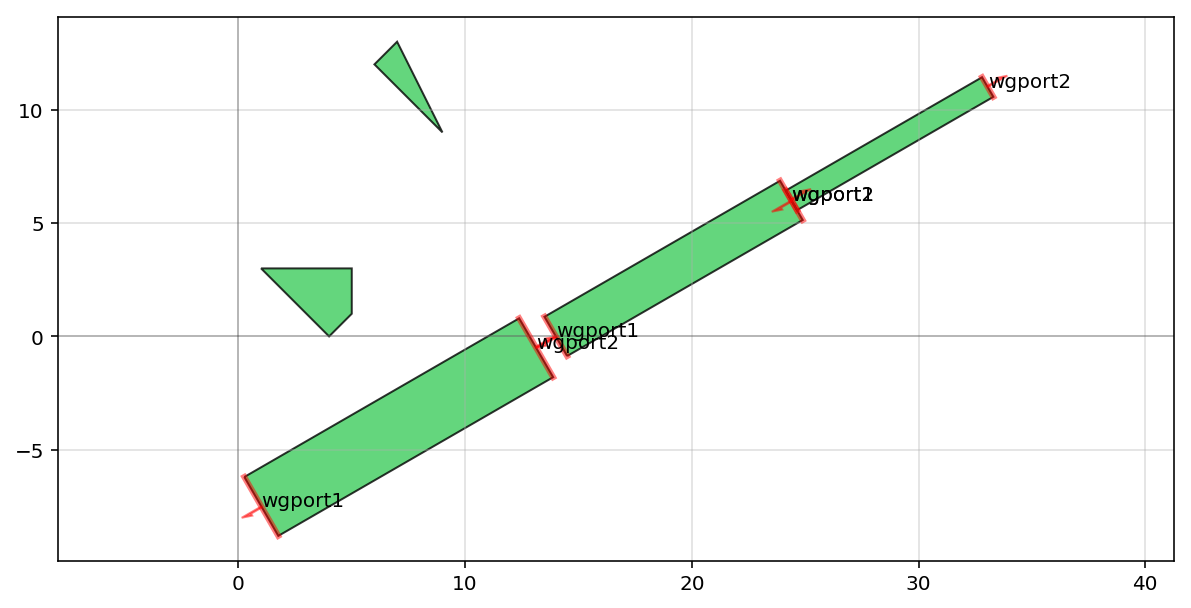

In [9]:
#==============================================================================
# Connecting devices with connect()
#==============================================================================
# The connect command allows us to connect DeviceReference ports together like
# Lego blocks.  There is an optional parameter called ``overlap`` which is
# useful if you have shapes you want to intersect with some overlap (or with a
# negative number, separate the ports).
wg1.connect(port = 'wgport1', destination = wg2.ports['wgport2'])
wg3.connect(port = 'wgport2', destination = wg2.ports['wgport1'], overlap = -1)

quickplot(D)

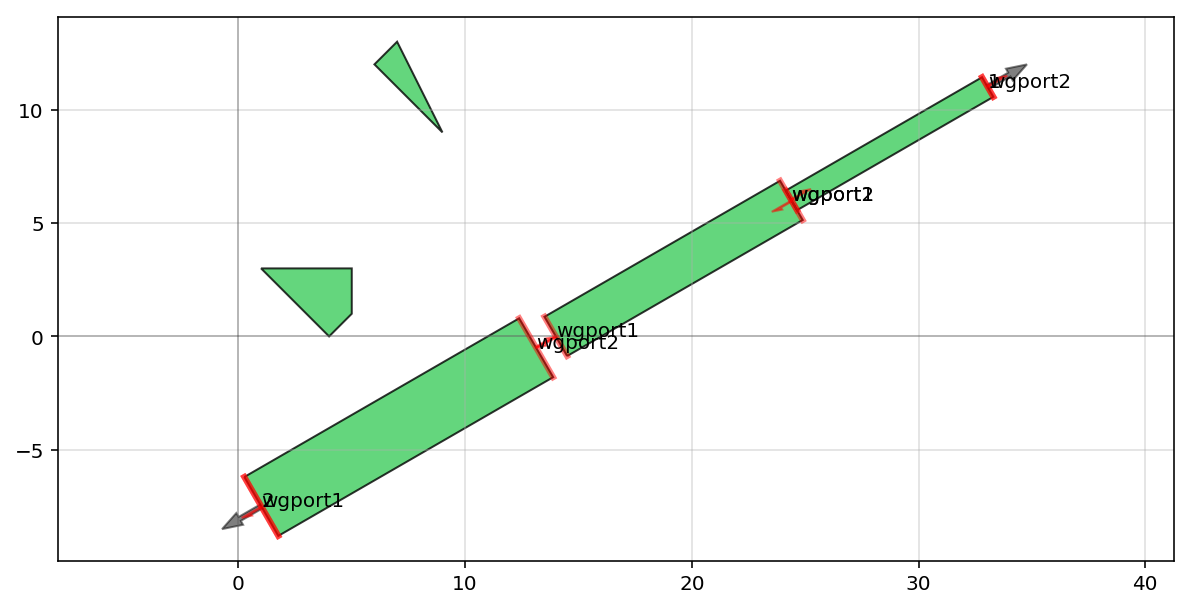

In [10]:
#==============================================================================
# Adding ports
#==============================================================================
# Although our waveguides wg1/wg2/wg3 have ports, they're only references
# of the device ``D`` we're working in, and D itself does not -- it only draws
# the subports (ports of wg1, wg2, wg3) as a convenience.  We need to add ports
# that we specifically want in our new device ``D``
D.add_port(port = wg1.ports['wgport2'], name = 1)
D.add_port(port = wg3.ports['wgport1'], name = 2)

quickplot(D)

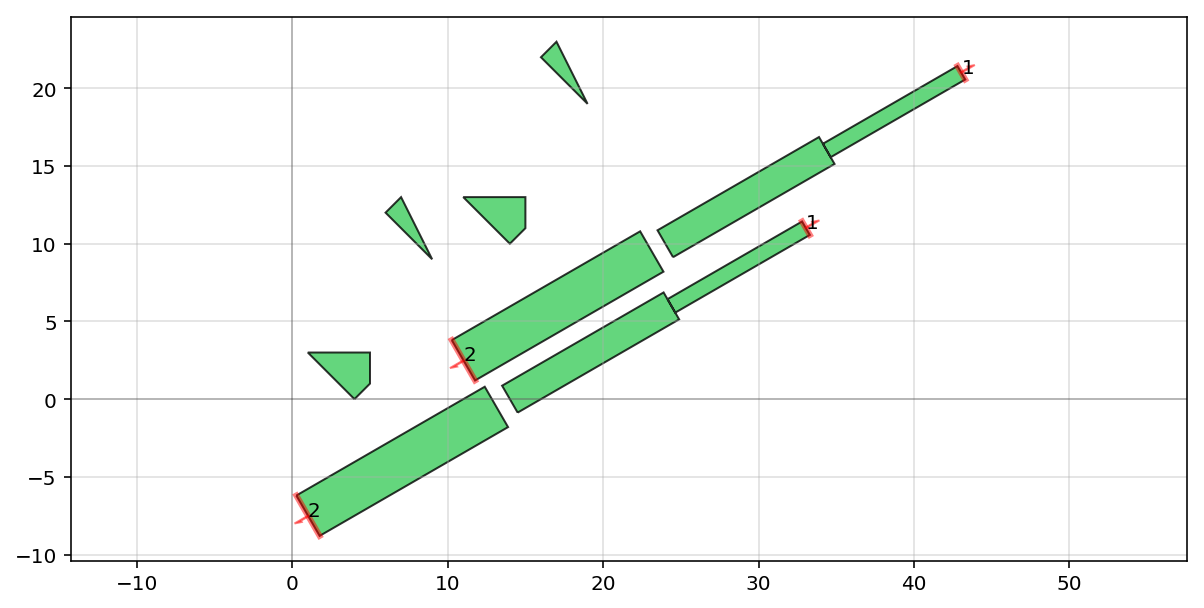

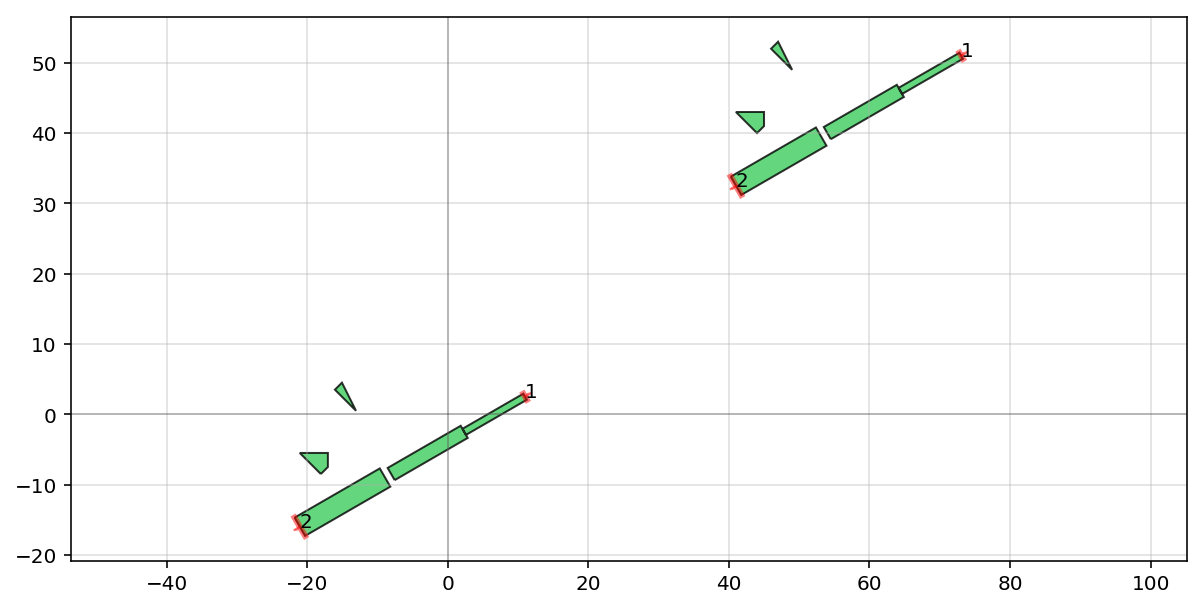

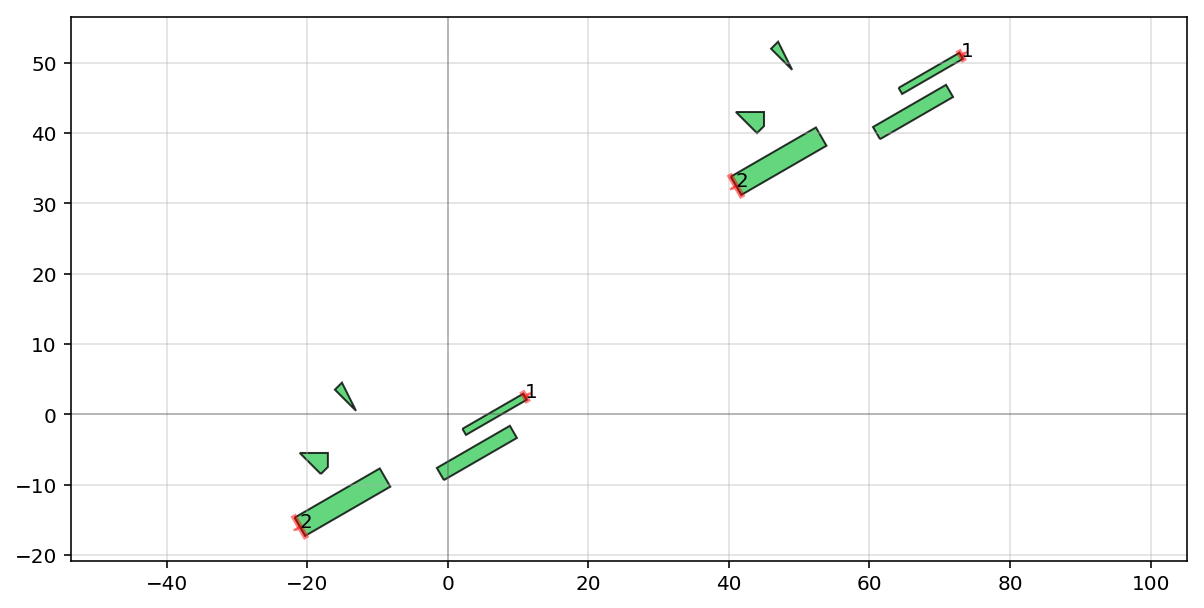

In [11]:
#==============================================================================
# Taking things a level higher
#==============================================================================
# Now that we have our device ``D`` which is a multi-waveguide device, we
# can add references to that device in a new blank canvas we'll call ``D2``.
# We'll add two copies of ``D`` to D2, and shift one so we can see them both
D2 = Device('MultiMultiWaveguide')
mwg1 = D2.add_ref(D)
mwg2 = D2.add_ref(D)
mwg2.move(destination = [10,10])

quickplot(D2)

# Like before, let's connect mwg1 and mwg2 together then offset them slightly
mwg1.connect(port = 1, destination = mwg2.ports[2])
mwg2.move(destination = [30,30])

quickplot(D2)


# Since the references mwg1 and mwg2 only point to the device ``D``, any
# changes that we make to the original ``D`` will be reflected in ``D2``

wg2.x += 7

quickplot(D2)

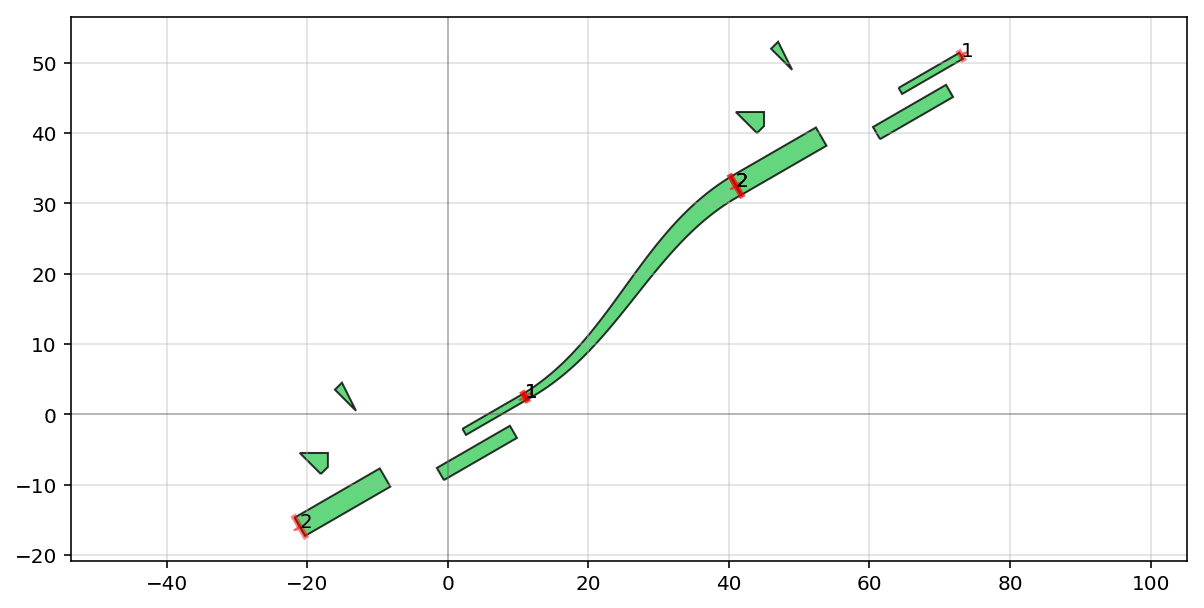

In [12]:
#==============================================================================
# Routing
#==============================================================================
# Routing allows us to connect two ports which face each other with a smooth
# polygon.  Since we connected our two
D2.add_ref( pr.route_basic(port1 = mwg1.ports[1], port2 = mwg2.ports[2], path_type = 'sine', width_type = 'straight') )
quickplot(D2)

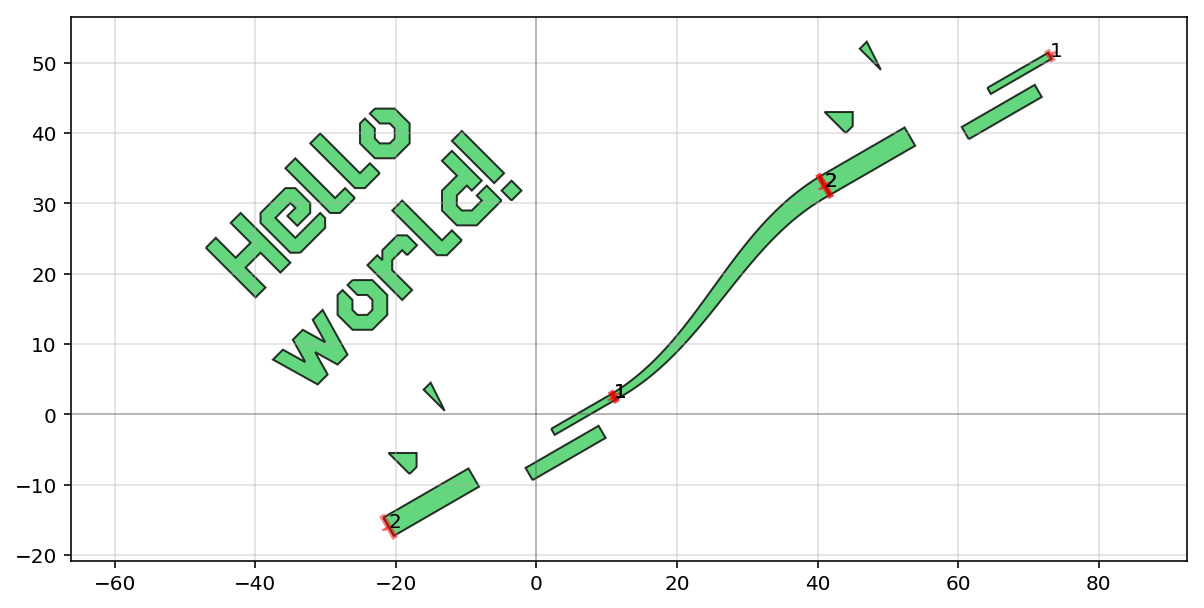

In [13]:
#==============================================================================
# Adding text
#==============================================================================
# The function text() creates a Device, just like waveguide.  Use it and
# manipulate it like any other Device
t = D2.add_ref( pg.text('Hello\nworld!', size = 10, justify = 'center'))
t.move([0,40]).rotate(45)
quickplot(D2)

In [14]:
#==============================================================================
# Labeling
#==============================================================================
# This label will display in a GDS viewer, but will not be rendered
# or printed like the polygons created by the text()
D2.label('First label', mwg1.center)
D2.label('Second label', mwg2.center)



#==============================================================================
# Saving the file as a .gds
#==============================================================================
D2.write_gds('MultiMultiWaveguideTutorial.gds')

Layer (name nb, GDS layer 5, GDS datatype 0, description Niobium liftoff, color #661919)


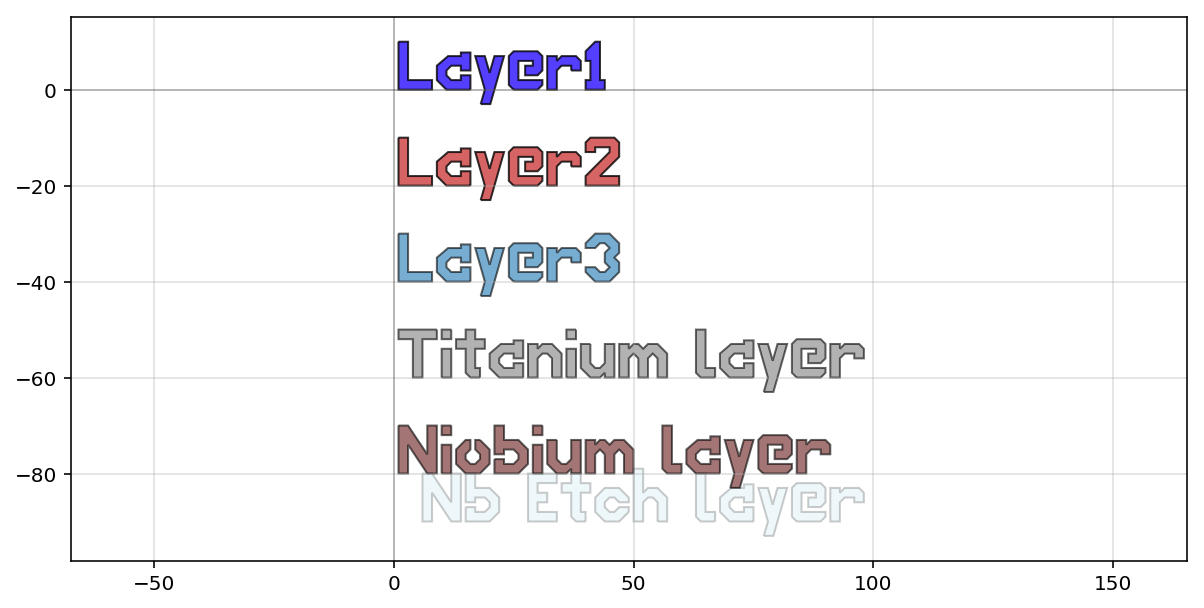

In [15]:
#==============================================================================
# Using Layers
#==============================================================================
# Let's make a new blank device DL and add some text to it, but this time on
# different layers
DL = Device()

# You can specify any layer in one of three ways:
# 1) as a single number 0-255 representing the gds layer number, e.g. layer = 1
# where the gds layer datatype will be automatically set to zero
DL.add_ref( pg.text('Layer1', size = 10, layer = 1) )


# 2) as a 2-element list [0,1] or tuple (0,1) representing the gds layer
# number (0-255) and gds layer datatype (0-255)
DL.add_ref( pg.text('Layer2', size = 10, layer = [2,5]) ).movey(-20)


# 3) as a Layer object
my_gold_layer = Layer(name = 'goldpads', gds_layer = 3, gds_datatype = 0, description = 'Gold pads liftoff')
DL.add_ref( pg.text('Layer3', size = 10, layer = my_gold_layer) ).movey(-40)


# What you can also do is make a set of layers, which lets you
# conveniently call each Layer object just by its name.  You can also specify
# the layer color using an RGB triplet e.g (0.1, 0.4, 0.2), an HTML hex color
# (e.g. #a31df4), or a CSS3 color name (e.g. 'gold' or 'lightblue'
# see http://www.w3schools.com/colors/colors_names.asp )
# The 'alpha' argument also lets you specify how transparent that layer should
# look when using quickplot (has no effect on the written GDS file)

ls = LayerSet() # Create a blank LayerSet
ls.add_layer(name = 'ti', gds_layer = 4, gds_datatype = 0, description = 'Titanium resistor', color = 'gray')
ls.add_layer(name = 'nb', gds_layer = 5, gds_datatype = 0, description = 'Niobium liftoff', color = (0.4,0.1,0.1))
ls.add_layer('nb_etch', 6, 0, color = 'lightblue', alpha = 0.2)


# Now that our layers are defined, we can call them from the LayerSet in the same way
# we would from a dictionary, where the name becomes the key:
text1 = DL.add_ref( pg.text('Titanium layer', size = 10, layer = ls['ti']) ).movey(-60)
text2 = DL.add_ref( pg.text('Niobium layer', size = 10, layer = ls['nb']) ).movey(-80)
text3 = DL.add_ref( pg.text('Nb Etch layer', size = 10, layer = ls['nb_etch']) ).movey(-90).movex(5)

quickplot(DL)

DL.write_gds('MultipleLayerText.gds')

# If we want to examine any single layer, we can call them by their names,
# for example
titanium_layer = ls['ti']
print(ls['nb'])

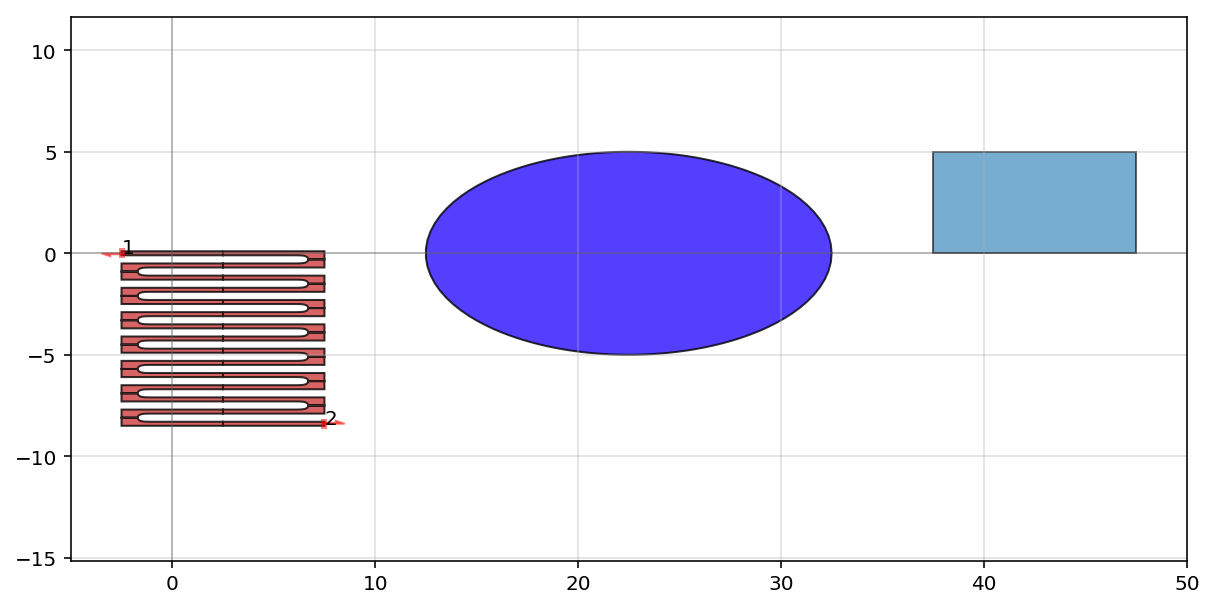

In [16]:
#==============================================================================
# Adding premade geometry with phidl.geometry
#==============================================================================
# Usually at the beginning of a phidl file we import the phidl.geometry module
# as ``pg``, like this:
import phidl.geometry as pg

# The ``pg`` module contains dozens of premade shapes and structures, ranging
# from simple ones like ellipses to complex photonic structures.  Let's create
# a few simple structures and plot them
D = Device()
G1 = pg.ellipse(radii = (10,5), angle_resolution = 2.5, layer = 1)
G2 = pg.snspd(wire_width = 0.2, wire_pitch = 0.6, size = (10,8), layer = 2)
G3 = pg.rectangle(size = (10,5), layer = 3)
g1 = D.add_ref(G1)
g2 = D.add_ref(G2)
g3 = D.add_ref(G3)
g1.xmin = g2.xmax + 5
g3.xmin = g1.xmax + 5
quickplot(D)

# There are dozens of these types of structures.  See the /phidl/geometry.py
# file for a full geometry list.  Note some of the more complex shapes are
# experimental and may change with time.


# Let's save this file so we can practice importing it in the next step
D.write_gds('MyNewGDS.gds')

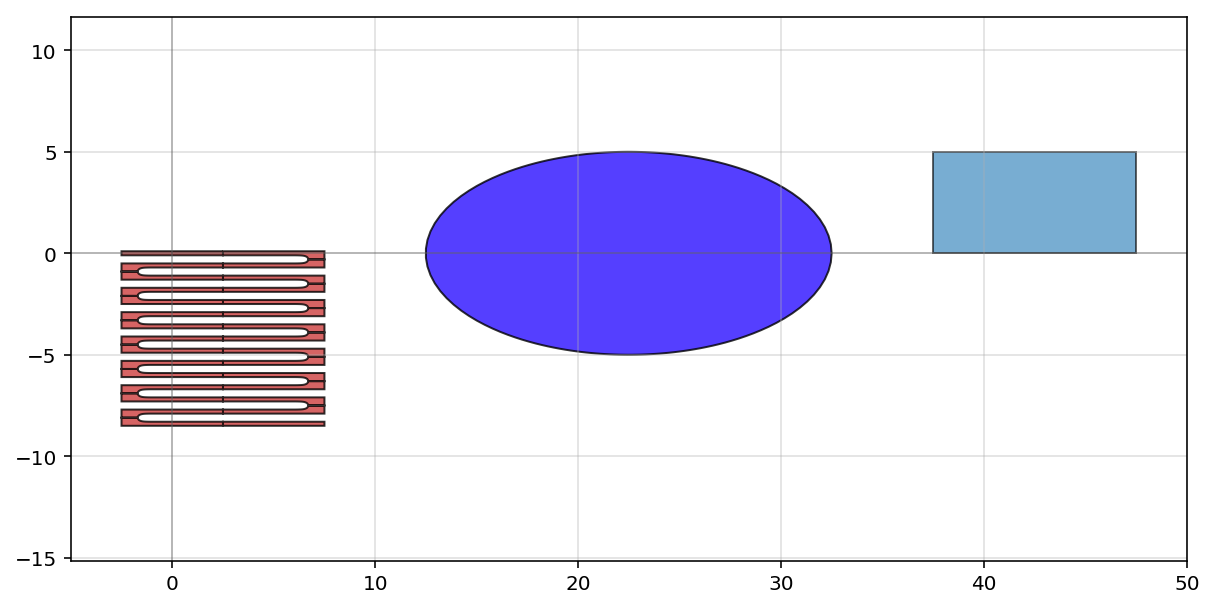

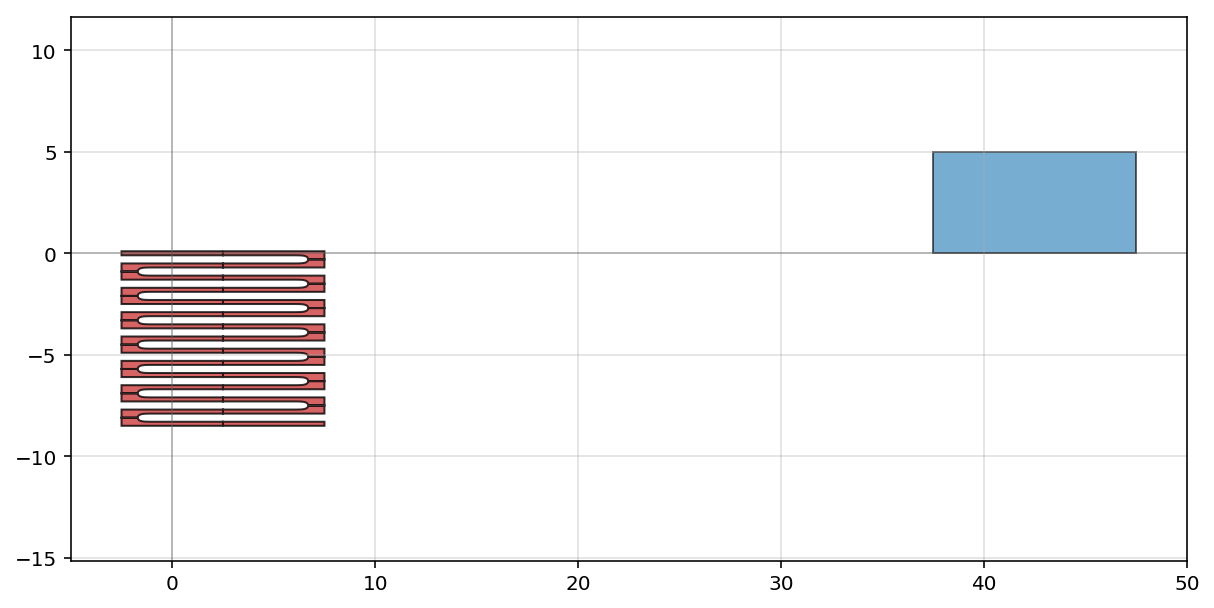

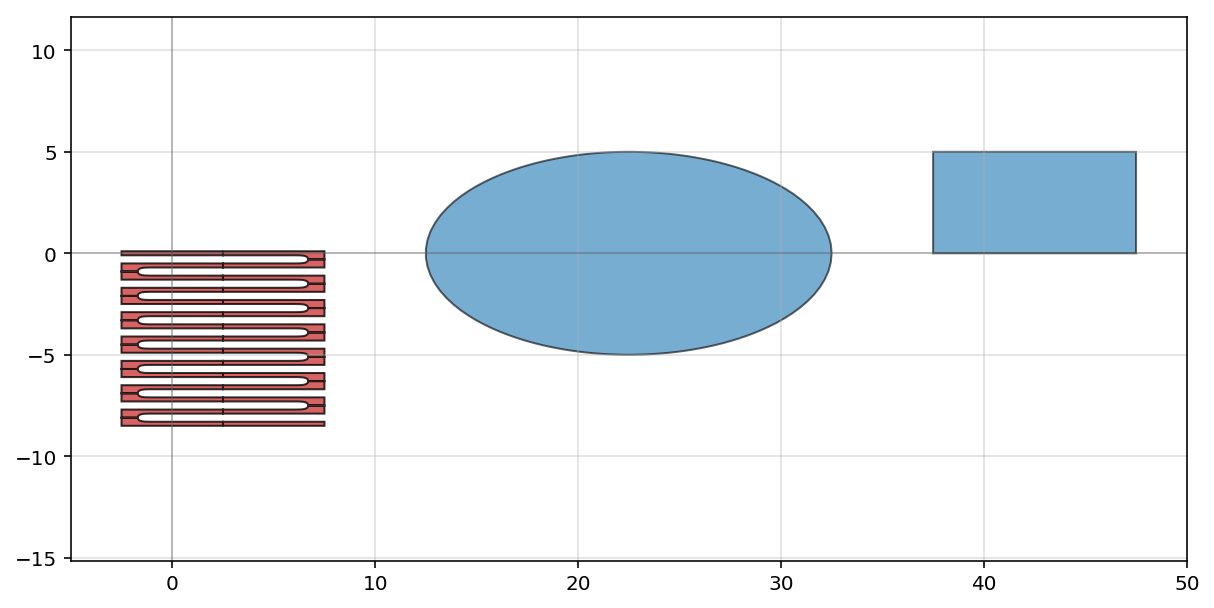

In [17]:
#==============================================================================
# Importing GDS files
#==============================================================================
# The phidl.geometry module is responsible for generating premade Devices.
# This includes imported geometry from other GDS files too.  When you import
# a GDS, you specify which layers you want, and it will import those layers
# as a new Device.  The new device can then be manipulated like any other.

# Let's import the GDS we just saved in the previous step.  Although generally
# you must specify which cell in the GDS file you want to import using the
# argument `cellname`, if the GDS file has only one top-level cell (like our
# MyNewGDS.gds file does), the cellname argument can be left out and
# import_gds() will import that top-level cell.

# Let's first just import the entire GDS as-is
E = pg.import_gds(filename = 'MyNewGDS.gds')
quickplot(E)

# Now say we only wanted to get layers 2 and 3 from the file.  We can specify
# a list of layers using the `layers` argument
E2 = pg.import_gds(filename = 'MyNewGDS.gds',
                   layers = [2, 3])
quickplot(E2)

# We can also use the `layers` argument to map layers arbitrarily. Say we
# wanted to combine shapes on layer 1 with those on layer 3, but leave layer 2
# on layer 2.  We can map layers 1->3, 3->3, 2->2  by passing a dict to the
# `layers` argument
E3 = pg.import_gds(filename = 'MyNewGDS.gds',
                   layers = {1: 3,  3: 3,  2: 2})
quickplot(E3)

In [18]:
#==============================================================================
# Label
#==============================================================================
# We can also label (annotate) our devices, in order to record information
# directly into the final GDS file without putting any extra geometry onto any
# layer

# Let's add an annotation to our Multi-Layer Text GDS file
DL.label(text = 'This is layer1\nit will be titanium', position = text1.center)
DL.label(text = 'This is niobium', position = text2.center)

# It's very useful for recording information about the devices or layout
DL.label(text = 'The x size of this\nlayout is %s' % DL.xsize,
            position = (DL.xmax, DL.ymax), layer = 255)

# Again, note we have to write the GDS for it to be visible (view in KLayout)
DL.write_gds('MultipleLayerText.gds')

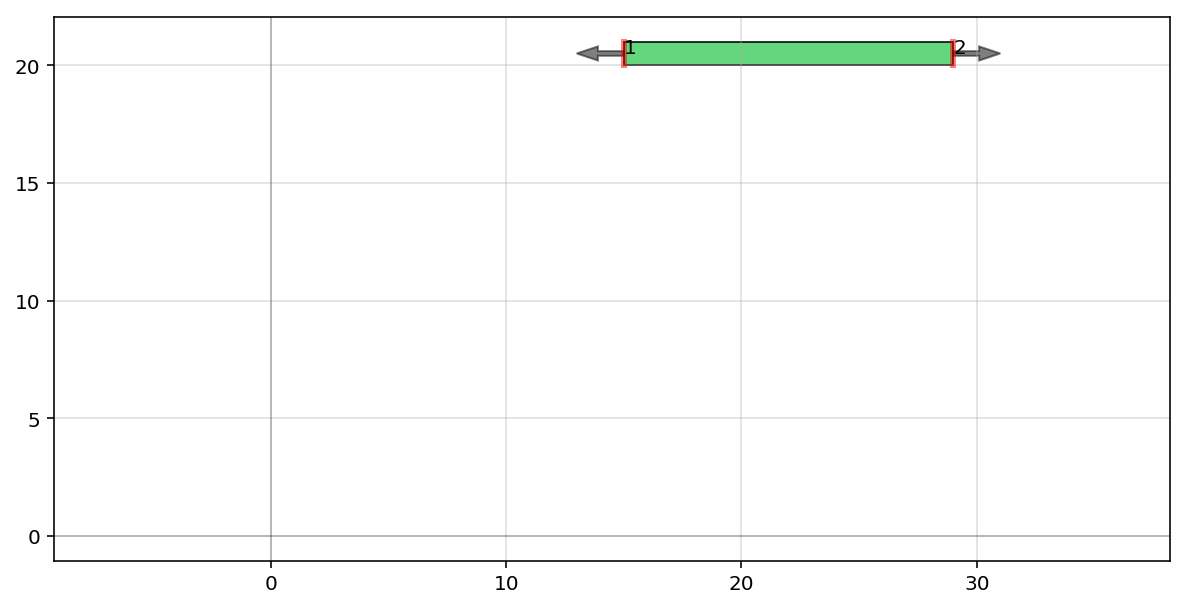

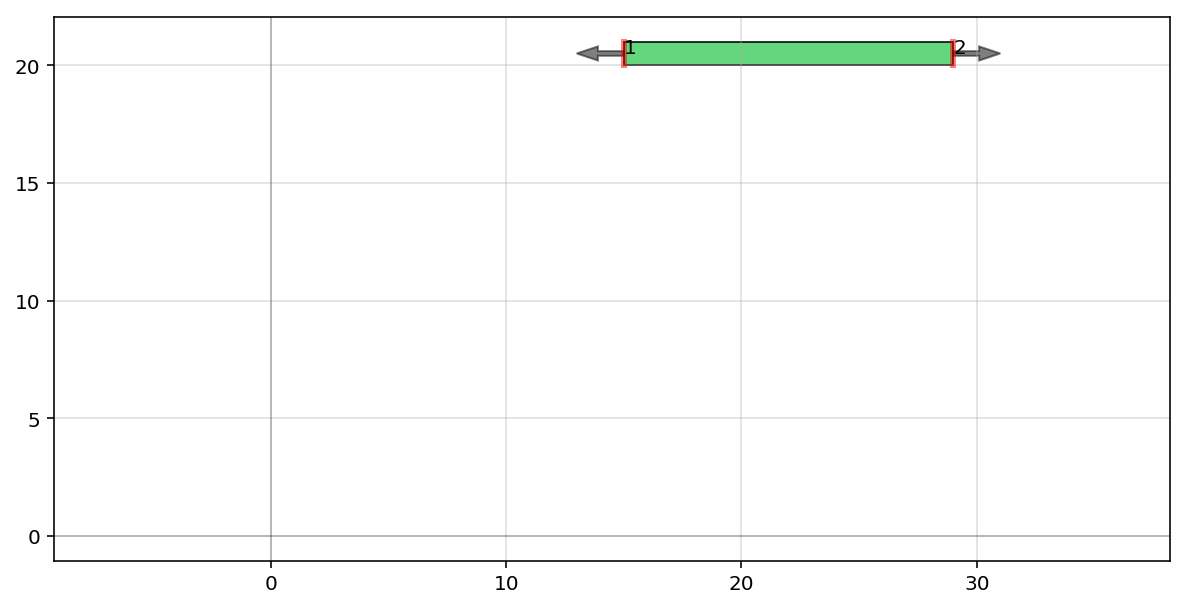

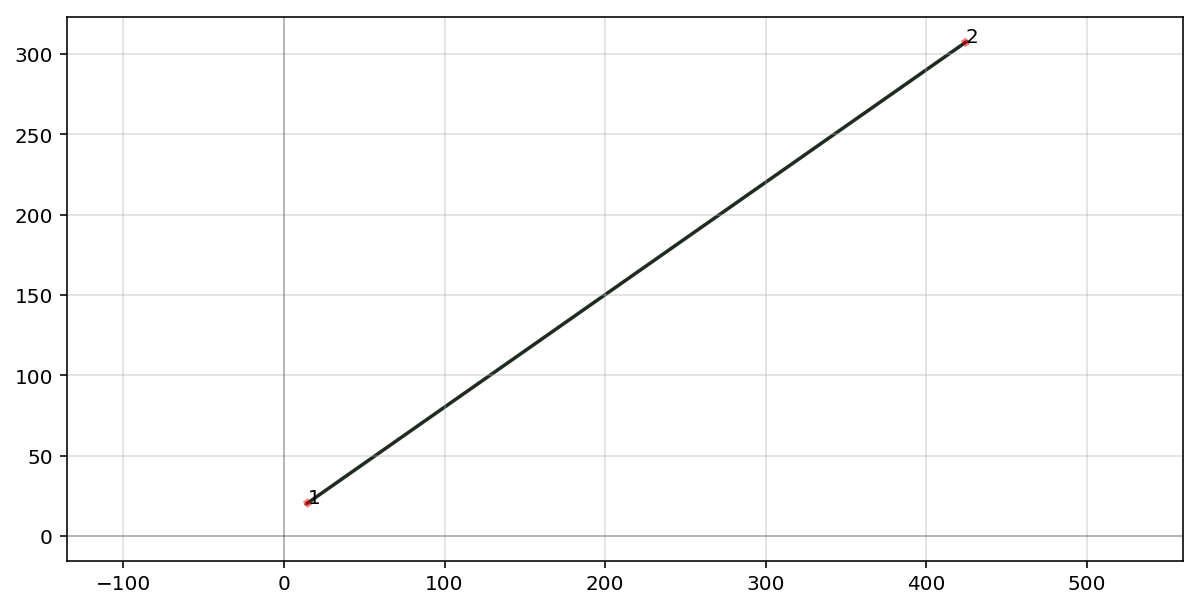

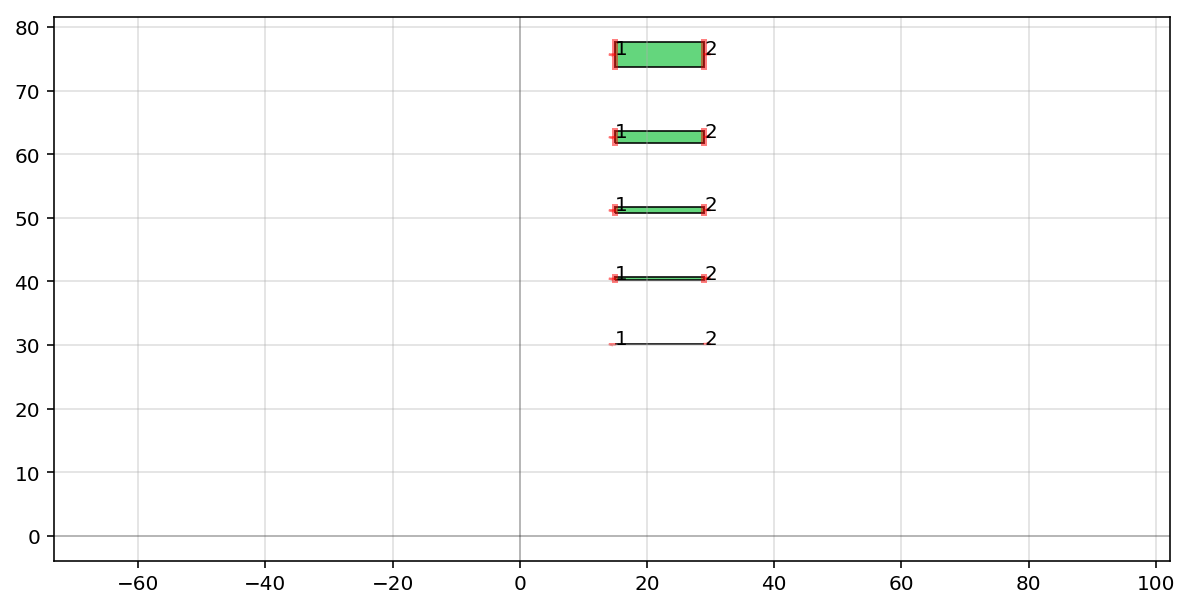

In [19]:
#==============================================================================
# Constructing a Device from set of parameters (dictionary or config file)
#==============================================================================
# Say we want to make a more complicated waveguide which requires more
# parameters.  Instead of passing them individually, we can store them in a
# dictionary (or configuration file) and pass that dictionary to the Device()
# function.

def complicated_waveguide(width = 10, height = 1, x = 10, y = 25, rotation = 15):
    C = Device('complicated_waveguide')
    C.add_polygon( [(0, 0), (width, 0), (width, height), (0, height)] )
    C.add_port(name = 1, midpoint = [0,height/2], width = height, orientation = 180)
    C.add_port(name = 2, midpoint = [width,height/2], width = height, orientation = 0)
    C.rotate(angle = rotation, center = (0,0))
    C.move((x,y))
    return C

cwg_parameters = {
            'width' : 14,
            'height' : 1,
            'x' : 15,
            'y' : 20,
            'rotation' : 0
            }

# We can either create the complicated_waveguide() the normal way
C1 = complicated_waveguide(width = 14, height = 1, x = 15, y = 20, rotation = 0)
quickplot(C1)

# Or we can pass the complicated_waveguide function and our parameter list
# to the Device() function which will generate it for us using our config
C2 = make_device(complicated_waveguide, config = cwg_parameters)
quickplot(C2)

# We can also override any parameter we like in our dictionary of parameters
# by adding keyword arguments -- the input dictionary is untouched afterwards
C3 = make_device(complicated_waveguide, config = cwg_parameters, width = 500, rotation = 35)
quickplot(C3)

# The most useful implementation of this is to keep a standard set of
# parameters and then override certain parameters each iteration of the for
# loop. Say we want to use our standard cwg_parameters but change the height
#  each time:
D = Device()
for h in [0.1, 0.5, 1, 2, 4]:
    C4 = make_device(complicated_waveguide, config = cwg_parameters, height = h)
    c4 = D.add_ref( C4 )
    c4.ymin = D.ymax + 10
quickplot(D)

{'circle1': DeviceReference (parent Device "circle000109", ports [], origin (0, 0), rotation 0, x_reflection False), 'circle2': DeviceReference (parent Device "circle000109", ports [], origin [15.  0.], rotation 0, x_reflection False)}
dict_keys(['circle1', 'circle2'])


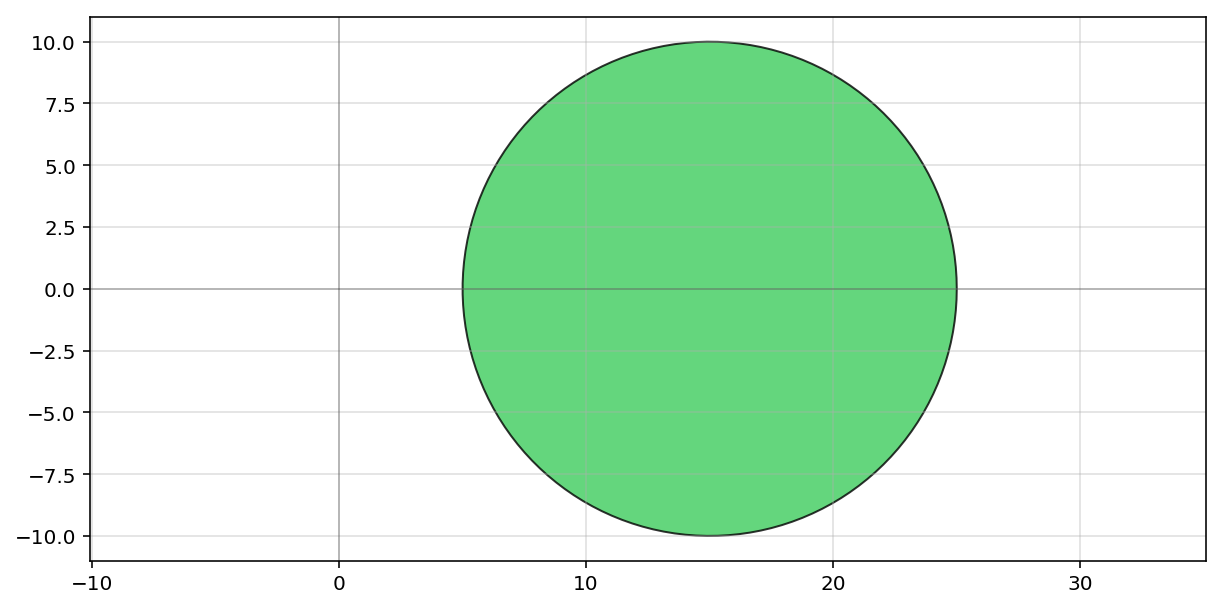

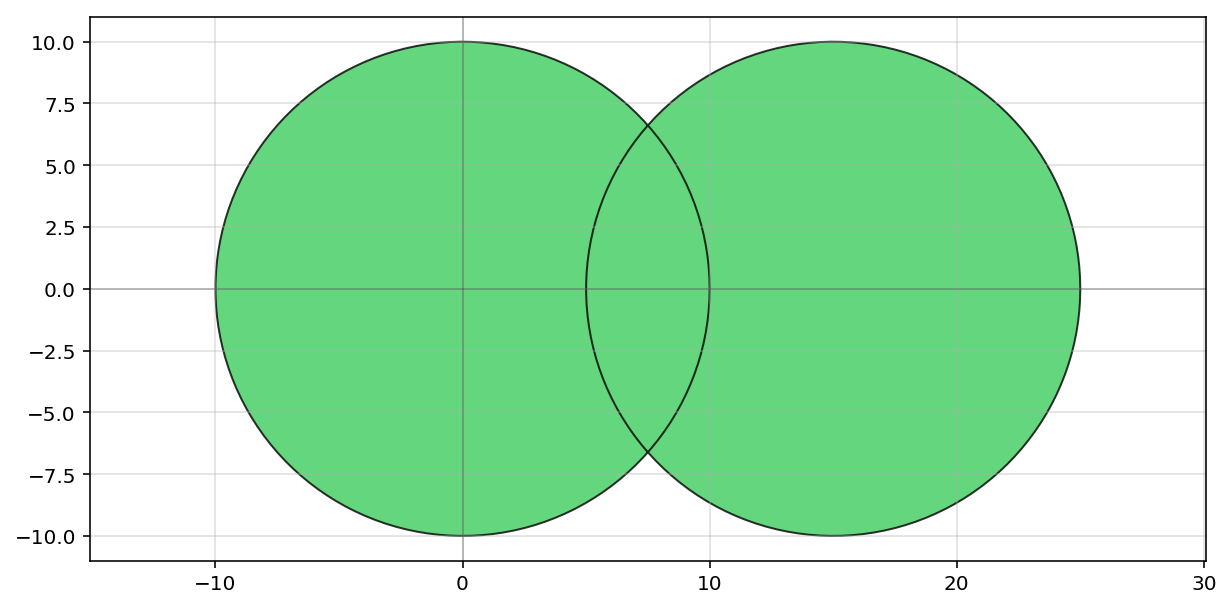

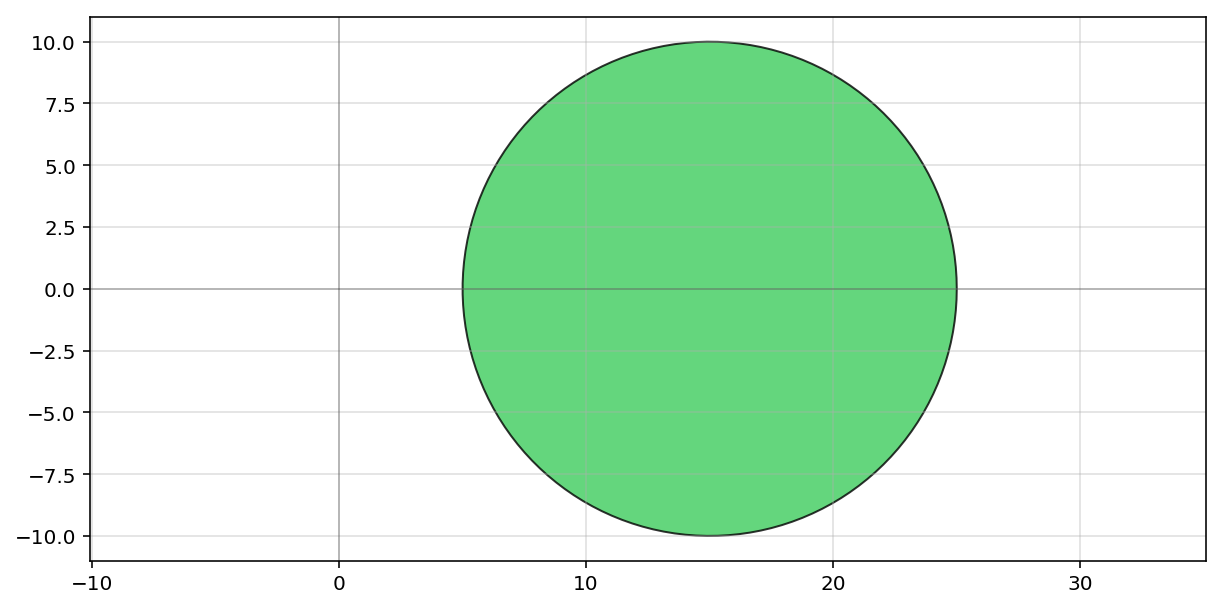

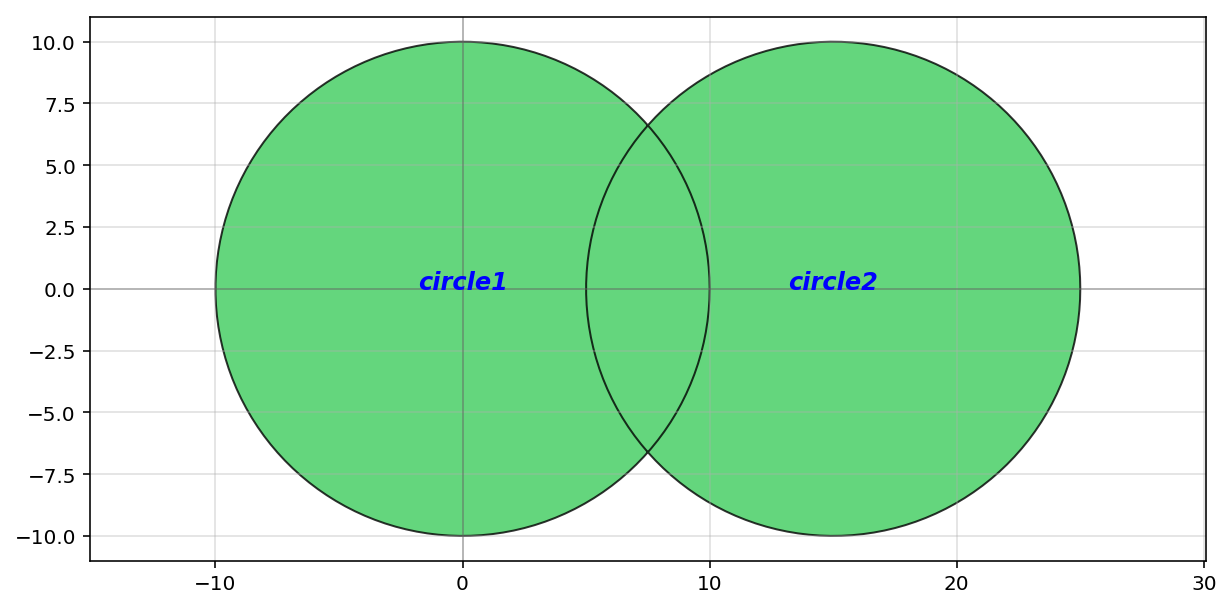

In [20]:
#==============================================================================
# Keeping track of geometry using the "alias" functionality
#==============================================================================
# It can be useful to keep track of our DeviceReferences without
# needing to assign the reference to a variable.  We can do this by specifying
# an 'alias' for the added DeviceReference.

# For instance, if we wanted to keep track of a circle references twice in D,
# we might normally assign each reference to a separate variable:
D = Device()
C = pg.circle()
c1 = D.add_ref(C)   # Add first reference
c2 = D.add_ref(C)   # Add second reference
c2.x += 15          # Move the second circle over by 10
quickplot(c2)
quickplot(D)


# But rather than cluttering up the list of variables with these refernces,
# we can instead create 'aliases' to each reference, and call them directly
# out of D like you would with a Python dictionary.  For example:
D = Device()
C = pg.circle()
D.add_ref(C, alias = 'circle1') # Add first reference
D.add_ref(C, alias = 'circle2') # Add second reference
D['circle2'].x += 15            # Moving the second circle over by 10
# Note that at this point, D['circle2'] is equivalent to the variable c2
# we made above
quickplot(D['circle2'], label_aliases = True)
quickplot(D, label_aliases = True)

# You can also access the list of aliases for your Device whenever you want
# to by accessing Device.aliases, which is a Python dictionary.  For example:
print(D.aliases)
print(D.aliases.keys())

In [21]:
#==============================================================================
# Flattening a Device
#==============================================================================
# Sometimes you want to remove references from a Device while keeping all
# of the shapes/polygons intact and in place.  The D.flatten() keeps all the
# polygons in D, but removes all the underlying references it's attached to.
# Also, if you specify the `single_layer` argument it will move all of the
# polyons to that single layer

D = Device()
E1 = pg.ellipse(layer = 1)
E2 = pg.ellipse(layer = 2)
D.add_ref(E1)
D.add_ref(E2).movex(15)

D.write_gds('D_ellipses.gds')
D.flatten()
D.write_gds('D_ellipses_flattened.gds')
D.flatten(single_layer = 5)
D.write_gds('D_ellipses_flattened_singlelayer.gds')